## Objective

In this assignment you will build a simple linear regression model and a polynomial regression model.

Then, you will compare the results to determine which one produces the best results.

### Import the libraries and methods needed for this project

In [57]:
""" Import the libraries

numpy
pandas
matplotlib
From sklearn import
- Linear Regression
- Polynomial Features
- Label Encoder
- Train-Test split
- metrics: MAE, MSE, R2 Score

"""

#<--- Your code goes here --->
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


### Load the data from the file "insurance.csv"

The file is on Canvas

In [20]:
# The path will depend on your Google Drive
#<--- Your code goes here --->
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/insurance.csv')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# Show the first five rows
#<--- Your code goes here --->
print(data.head())



   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


### Let's preprocess the data

In [23]:
## Use a Label Encode to encode the columns "sex","smoker", and "region"

#<--- Your code goes here --->
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode the 'sex' column
data['sex_idx'] = label_encoder.fit_transform(data['sex'])

# Encode the 'smoker' column
data['smoker_idx'] = label_encoder.fit_transform(data['smoker'])

# Encode the 'region' column
data['region_idx'] = label_encoder.fit_transform(data['region'])



In [26]:
# Show the new data
#<--- Your code goes here --->
print(data)

      age     sex     bmi  children smoker     region      charges  sex_idx  \
0      19  female  27.900         0    yes  southwest  16884.92400        0   
1      18    male  33.770         1     no  southeast   1725.55230        1   
2      28    male  33.000         3     no  southeast   4449.46200        1   
3      33    male  22.705         0     no  northwest  21984.47061        1   
4      32    male  28.880         0     no  northwest   3866.85520        1   
...   ...     ...     ...       ...    ...        ...          ...      ...   
1333   50    male  30.970         3     no  northwest  10600.54830        1   
1334   18  female  31.920         0     no  northeast   2205.98080        0   
1335   18  female  36.850         0     no  southeast   1629.83350        0   
1336   21  female  25.800         0     no  southwest   2007.94500        0   
1337   61  female  29.070         0    yes  northwest  29141.36030        0   

      smoker_idx  region_idx  
0              1    

### Split the dataframe into X and y

In [27]:
# Use the following columns for X: "age", "sex_idx", "smoker_idx", "region_idx", "bmi", "children"
# Use 'charges' for the target variable

#<--- Your code goes here --->
# Selecting features (X) and target variable (y)
X = data[['age', 'sex_idx', 'smoker_idx', 'region_idx', 'bmi', 'children']]
y = data['charges']

# Displaying the shape of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (1338, 6)
Shape of y: (1338,)


### Let's first create a simple Linear Regression model

#### Get train and test data

In [37]:
# use 80% for training and 20% for testing. Use 42 as the random seed.

#<--- Your code goes here --->

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1070, 6)
X_test shape: (268, 6)
y_train shape: (1070,)
y_test shape: (268,)


#### Print the number of rows and columns for each dataset

In [38]:
#<--- Your code goes here --->
# Print the number of rows and columns for the training set
print("Training set:")
print("Number of rows:", X_train.shape[0])
print("Number of columns:", X_train.shape[1])

# Print the number of rows and columns for the testing set
print("\nTesting set:")
print("Number of rows:", X_test.shape[0])
print("Number of columns:", X_test.shape[1])


Training set:
Number of rows: 1070
Number of columns: 6

Testing set:
Number of rows: 268
Number of columns: 6


### Create a simple Linear Regression model

In [40]:
# Instantiate a new Linear Regression model
#<--- Your code goes here --->
linear_regression_model = LinearRegression()

# Train the model
#<--- Your code goes here --->
linear_regression_model.fit(X_train, y_train)

LinearRegression()

#### Make predictions using the test data

In [42]:
#<--- Your code goes here --->
y_pred = linear_regression_model.predict(X_test)

# Display the first few predictions
print("Predictions:")
print(y_pred[:5])


Predictions:
[ 8924.40724442  7116.29501758 36909.01352144  9507.87469118
 27013.3500079 ]


### Compute the metrics for this model

In [47]:
# Compure MAE
#<--- Your code goes here --->
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
# Compute MSE
#<--- Your code goes here --->
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
# Compute RMSE
#<--- Your code goes here --->
rmse = np.sqrt(mse)
# Display the computed RMSE
print("Root Mean Squared Error (RMSE):", rmse)
# Compute R2 score
#<--- Your code goes here --->
r2 = r2_score(y_test, y_pred)
print("R-squared Score (R2 Score):", r2)

Mean Absolute Error (MAE): 4186.5088983664355
Mean Squared Error (MSE): 33635210.431178406
Root Mean Squared Error (RMSE): 5799.587091438356
R-squared Score (R2 Score): 0.7833463107364539


### Plot the residuals (y_test - predictions)

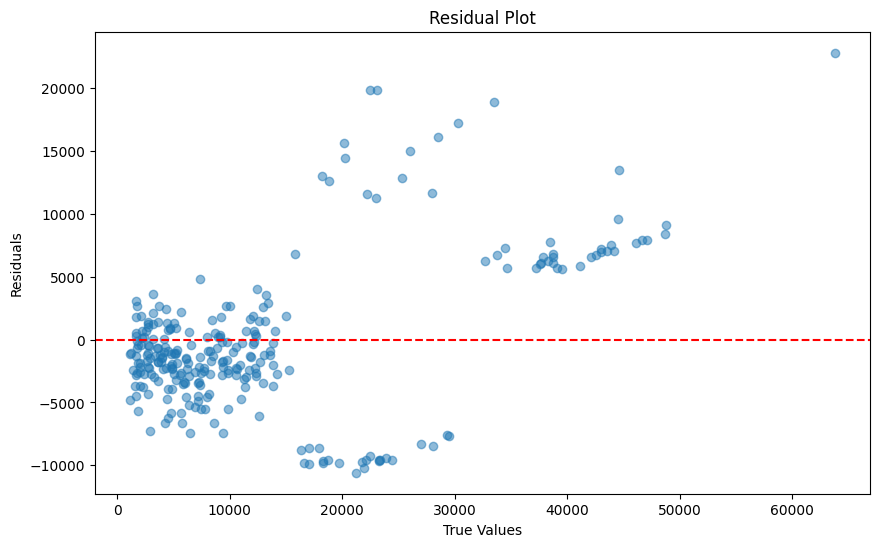

In [48]:
# residuals = y_test - predictions
#<--- Your code goes here --->
residuals = y_test - y_pred

# x-axis=y_test, y-axis=residuals
#<--- Your code goes here --->
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.show()



### Now, create a polynomial model

#### Use a polynomial trasnformer to train and transform your data

Remember that you don't want to have 'data leakage'. Then train the transformer just with X_train

In [51]:
# Use a degree 2 and do not include bias
#<--- Your code goes here --->
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)

# Create your new X_train and X_test
#<--- Your code goes here --->
poly_transformer.fit(X_train)

X_train_poly = poly_transformer.transform(X_train)
X_test_poly = poly_transformer.transform(X_test)

In [52]:
# Shot the first 3 rows of your new X_train
#<--- Your code goes here --->
print(X_train_poly[:3])


[[4.600000e+01 0.000000e+00 0.000000e+00 1.000000e+00 1.995000e+01
  2.000000e+00 2.116000e+03 0.000000e+00 0.000000e+00 4.600000e+01
  9.177000e+02 9.200000e+01 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 1.000000e+00 1.995000e+01 2.000000e+00 3.980025e+02
  3.990000e+01 4.000000e+00]
 [4.700000e+01 0.000000e+00 0.000000e+00 0.000000e+00 2.432000e+01
  0.000000e+00 2.209000e+03 0.000000e+00 0.000000e+00 0.000000e+00
  1.143040e+03 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 5.914624e+02
  0.000000e+00 0.000000e+00]
 [5.200000e+01 0.000000e+00 0.000000e+00 2.000000e+00 2.486000e+01
  0.000000e+00 2.704000e+03 0.000000e+00 0.000000e+00 1.040000e+02
  1.292720e+03 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.

### Create aand train a new Logistic Regression model

In [56]:
# Create a new model
#<--- Your code goes here --->
linear_regression_model = LinearRegression()
# Train the model
#<--- Your code goes here --->
linear_regression_model.fit(X_train_poly, y_train)


LinearRegression()

### Make predictions using this model

In [61]:
#<--- Your code goes here --->
y_pred_poly = linear_regression_model.predict(X_test_poly)
print("Predictions:")
print(y_pred_poly[:5])


Predictions:
[11180.05794894  6571.37648261 34066.03843575 10340.24620623
 29435.50134732]


### Compute the metrics for this model

In [63]:
# Compure MAE
#<--- Your code goes here --->
mae_poly = mean_absolute_error(y_test, y_pred_poly)
print("MAE:", mae_poly)
# Compute MSE
#<--- Your code goes here --->
mse_poly = mean_squared_error(y_test, y_pred_poly)
print("MSE:", mse_poly)
# Compute RMSE
#<--- Your code goes here --->
rmse_poly = np.sqrt(mse_poly)
print("RMSE:", rmse_poly)
# Compute R2 score
#<--- Your code goes here --->
r2_poly = r2_score(y_test, y_pred_poly)
print("R2 Score:", r2_poly)

MAE: 2730.315581680473
MSE: 20530608.942951925
RMSE: 4531.071500534054
R2 Score: 0.867756671853774


### Plot the residuals (y_test - predictions)

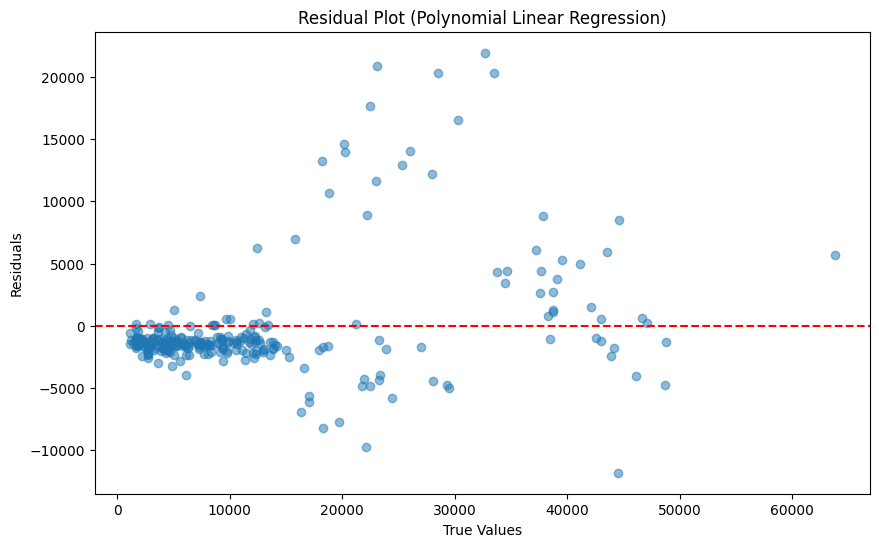

In [64]:
# residuals = y_test - predictions
#<--- Your code goes here --->
residuals_poly = y_test - y_pred_poly

# x-axis=y_test, y-axis=residuals
#<--- Your code goes here --->
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals_poly, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot (Polynomial Linear Regression)')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.show()

## That's it. We have improved the prediction!

## Now, to finish, write a paragraph with the following:
- your conclusions
- what would you change to try to improve these results?

The conclusions that can be made are that polynomial Linear Regression model seems to perform a little bit better of predicitve accuracy than comopared to the basic Linear Regraession model. With the lower values of evaluation metriscs such as MAE, MSE, and RMSE. To help improve the results different regression techniques could be used such as Ridge Regression or Lasso Regression. Using feature engineering techiniques could also be used to help improve the model's predictive performance. Finally, using a kmore thorough data preprocessing couold also helop with a better model performance.